# In this project we will classify various DNA Sequence types:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# We have 3 datasets for DNA sequence :Human,dog and chimpanzee

In [3]:
human_dt=pd.read_table("Dataset/human_data.txt")
human_dt.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
human_dt.shape

(4380, 2)

In [5]:
dog_dt=pd.read_table("Dataset/dog_data.txt")
dog_dt.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [6]:
dog_dt.shape

(820, 2)

In [7]:
chimp_dt=pd.read_table("Dataset/chimp_data.txt")
chimp_dt.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [8]:
chimp_dt.shape

(1682, 2)

# Treating DNA-Sequence  as language  we apply K-mers to the string: 

In [9]:
#we take size of 6 for the DNA-Sequence:

def getkmers(sequence,size):
    getlist=[]
    for i in range(len(sequence)-size+1):
        getlist.append(sequence[i:i+size].lower())
    return getlist

In [10]:
human_dt['words']=human_dt.apply(lambda x:getkmers(x['sequence'],6),axis=1)
human_dt.drop(columns=['sequence'],axis=1,inplace=True)
dog_dt['words']=dog_dt.apply(lambda y:getkmers(y['sequence'],6),axis=1)
dog_dt.drop(columns=['sequence'],axis=1,inplace=True)
chimp_dt['words']=chimp_dt.apply(lambda z:getkmers(z['sequence'],6),axis=1)
chimp_dt.drop(columns=['sequence'],axis=1,inplace=True)

In [11]:
human_dt.tail()

,class,words
4375,0,"[atggaa, tggaag, ggaaga, gaagat, aagatt, agatt..."
4376,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4377,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."
4378,6,"[atgggg, tggggc, ggggca, gggcac, ggcacc, gcacc..."
4379,6,"[atgcag, tgcagt, gcagtc, cagtcc, agtcct, gtcct..."


In [12]:
dog_dt.tail()

,class,words
815,5,"[atggtc, tggtcg, ggtcgg, gtcggt, tcggtc, cggtc..."
816,6,"[atggcg, tggcgg, ggcggc, gcggcg, cggcga, ggcga..."
817,6,"[atgagc, tgagct, gagctc, agctcg, gctcgg, ctcgg..."
818,1,"[gccccg, ccccga, cccgag, ccgagg, cgagga, gagga..."
819,6,"[atggcc, tggcct, ggcctg, gcctgg, cctggg, ctggg..."


In [13]:
chimp_dt.tail()

,class,words
1677,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1678,5,"[atgctg, tgctga, gctgag, ctgagc, tgagcg, gagcg..."
1679,6,"[atgaag, tgaagc, gaagcg, aagcga, agcgac, gcgac..."
1680,3,"[atgact, tgactg, gactgg, actgga, ctggaa, tggaa..."
1681,3,"[atgttg, tgttgc, gttgcc, ttgccc, tgccca, gccca..."


In [14]:
#Applying Count vectorizer for the list of words in each dataset:

human_text=[]

for i in range(len(human_dt['words'])):
    human_text.append(human_dt['words'][i])

In [15]:
for item in range(len(human_text)):
    human_text[item]=" ".join(human_text[item])
print(human_text[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(4,4))
X=cv.fit_transform(human_text)

In [17]:
Y=human_dt['class']

In [18]:
#Splitting the training and testing data:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [19]:
Xtrain.shape

(3504, 232414)

In [20]:
Xtest.shape

(876, 232414)

In [21]:
Ytrain.shape

(3504,)

In [22]:
Ytest.shape

(876,)

C:\Users\a0g0btd\Anaconda3\envs\DNASequence\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

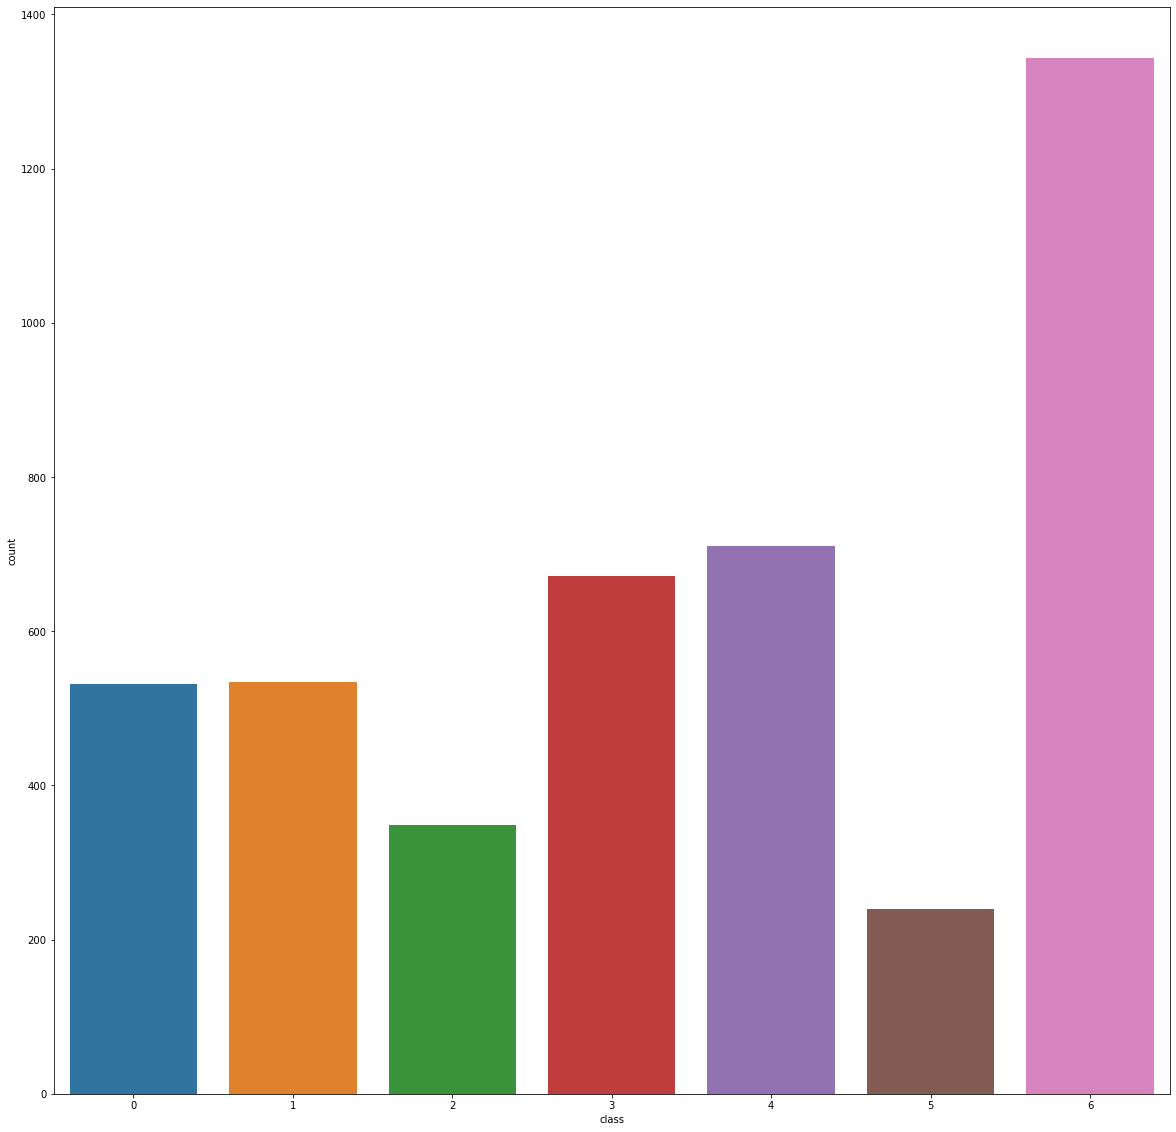

In [23]:
#Check whether the target class is balanced or not:

plt.figure(figsize=(20,20))
sns.countplot(human_dt['class'])

In [63]:
#Inference: we have relatively balanced dataset.But this will not affect the prediction and also do not overfit

In [25]:
#Applying the MultinomialNB for classification:

from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()

mnb.fit(Xtrain,Ytrain)

MultinomialNB()

In [26]:
pred=mnb.predict(Xtest)

In [27]:
pred

array([3, 6, 6, 6, 3, 6, 6, 6, 4, 1, 6, 6, 6, 3, 6, 6, 6, 6, 6, 6, 0, 3,
       4, 3, 1, 5, 0, 3, 6, 6, 6, 6, 5, 4, 3, 6, 4, 3, 1, 6, 0, 0, 3, 4,
       6, 2, 1, 6, 6, 1, 4, 6, 6, 4, 0, 3, 3, 6, 4, 6, 6, 5, 3, 6, 3, 6,
       5, 1, 6, 6, 5, 1, 6, 6, 3, 0, 6, 3, 5, 4, 6, 2, 5, 3, 1, 5, 2, 6,
       4, 1, 4, 3, 6, 4, 2, 1, 6, 3, 3, 4, 3, 6, 3, 6, 0, 4, 1, 2, 3, 6,
       0, 6, 6, 0, 3, 1, 4, 6, 4, 5, 3, 3, 0, 6, 5, 6, 6, 0, 0, 2, 4, 1,
       2, 6, 3, 3, 0, 6, 6, 3, 4, 1, 4, 3, 1, 6, 3, 0, 6, 5, 0, 1, 6, 4,
       6, 6, 5, 6, 2, 4, 1, 0, 2, 0, 1, 0, 6, 6, 3, 3, 5, 6, 0, 4, 1, 4,
       0, 6, 2, 0, 6, 0, 5, 3, 1, 5, 1, 0, 6, 0, 0, 6, 6, 6, 0, 3, 4, 6,
       4, 2, 6, 1, 3, 6, 6, 3, 2, 6, 3, 1, 3, 4, 3, 1, 6, 0, 1, 1, 0, 5,
       6, 6, 6, 5, 4, 4, 4, 1, 4, 6, 5, 3, 6, 1, 5, 6, 6, 2, 4, 3, 3, 6,
       4, 1, 2, 3, 6, 6, 4, 6, 1, 1, 3, 2, 4, 6, 6, 6, 0, 4, 6, 3, 4, 0,
       3, 3, 6, 4, 4, 6, 4, 6, 0, 6, 3, 6, 6, 3, 0, 3, 3, 2, 6, 6, 4, 3,
       2, 6, 6, 2, 1, 1, 0, 6, 3, 1, 6, 1, 6, 5, 6,

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(Ytest,pred)
print(accuracy)
print("*"*80)

confusion_matrix=confusion_matrix(Ytest,pred)
print(confusion_matrix)
print("*"*80)

classification_report=classification_report(Ytest,pred)
print(classification_report)
print("*"*80)

0.978310502283105
********************************************************************************
[[ 95   0   0   0   2   0   0]
 [  0 100   0   1   0   0   2]
 [  0   0  61   0   0   0   2]
 [  0   0   0 134   1   0   1]
 [  1   0   0   1 152   1   0]
 [  0   0   0   0   0  48   0]
 [  0   0   0   0   3   4 267]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       1.00      0.97      0.99       103
           2       1.00      0.97      0.98        63
           3       0.99      0.99      0.99       136
           4       0.96      0.98      0.97       155
           5       0.91      1.00      0.95        48
           6       0.98      0.97      0.98       274

    accuracy                           0.98       876
   macro avg       0.97      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876

*****

In [29]:
#Applying hyper-parametre tuning to MultinomialNB classifier:

alpha=[0.1,0.01,0.001]

from sklearn.model_selection import GridSearchCV

gsv=GridSearchCV(estimator=MultinomialNB(),param_grid={"alpha":[0.1,0.01,0.001]},cv=5)

gsv.fit(Xtrain,Ytrain)

gsv_pred=gsv.predict(Xtest)

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(Ytest,gsv_pred)
print(accuracy)
print("*"*80)

confusion_matrix=confusion_matrix(Ytest,gsv_pred)
print(confusion_matrix)
print("*"*80)

classification_report=classification_report(Ytest,gsv_pred)
print(classification_report)
print("*"*80)

0.9726027397260274
********************************************************************************
[[ 96   0   0   0   0   0   1]
 [  0 101   0   1   0   0   1]
 [  0   0  61   0   0   0   2]
 [  0   0   0 133   0   0   3]
 [  3   0   0   0 142   0  10]
 [  0   0   0   0   0  48   0]
 [  2   0   0   0   1   0 271]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        97
           1       1.00      0.98      0.99       103
           2       1.00      0.97      0.98        63
           3       0.99      0.98      0.99       136
           4       0.99      0.92      0.95       155
           5       1.00      1.00      1.00        48
           6       0.94      0.99      0.96       274

    accuracy                           0.97       876
   macro avg       0.98      0.97      0.98       876
weighted avg       0.97      0.97      0.97       876

****

In [32]:
gsv.best_estimator_

MultinomialNB(alpha=0.1)

In [33]:
gsv.best_params_

{'alpha': 0.1}

In [34]:
gsv.best_score_

0.9637558589769716

In [35]:
#Now applying the k-mers technique for Dog and Chimpanzee DNA Sequences:

dog_dt.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


In [41]:
#Converting words into list :

dog_text=[]

for i in range(len(dog_dt['words'])):
    dog_text.append(dog_dt['words'][i])
for item in range(len(dog_text)):
    dog_text[item]=" ".join(dog_text[item])
print(dog_text[2])

atggaa tggaaa ggaaac gaaaca aaacac aacacc acaccc caccct accctt cccttc ccttct cttcta ttctac tctacg ctacgg tacggc acggcg cggcga ggcgat gcgatg cgatga gatgag atgagg tgaggc gaggcg aggcgc ggcgct gcgctg cgctga gctgag ctgagc tgagcg gagcgg agcggc gcggcc cggcct ggcctg gcctgg cctggg ctgggc tgggcg gggcgg ggcggc gcggcg cggcgg ggcggc gcggcg cggcgt ggcgtc gcgtca cgtcag gtcagt tcagta cagtag agtagc gtagca tagcag agcagt gcagtg cagtgg agtggc gtggcg tggcgg ggcggc gcggcg cggcgg ggcggt gcggtg cggtgg ggtggt gtggta tggtag ggtagc gtagct tagctt agcttc gcttcg cttcgc ttcgcg tcgcgt cgcgtc gcgtcc cgtccc gtcccc tccccg ccccgg cccggg ccgggt cgggtc gggtcg ggtcgc gtcgcc tcgcct cgcctg gcctgt cctgtt ctgttt tgtttc gtttcc tttccc ttcccg tcccgg cccggg ccgggg cggggc ggggcg gggcgc ggcgcc gcgccc cgcccc gccccc cccccg ccccga cccgac ccgacg cgacgg gacggc acggcg cggcgg ggcggc gcggcg cggcga ggcgac gcgact cgactg gactgg actggc ctggca tggcag ggcagc gcagca cagcat agcatg gcatga catgat atgatg tgatga gatgaa atgaag tgaaga gaagaa aagaaa agaaag

In [43]:
chimp_text=[]

for i in range(len(chimp_dt['words'])):
    chimp_text.append(chimp_dt['words'][i])
for item in range(len(chimp_text)):
    chimp_text[item]=" ".join(chimp_text[item])
print(chimp_text[2])

atggcc tggcct ggcctc gcctcg cctcgc ctcgcg tcgcgc cgcgct gcgctg cgctgg gctggt ctggtg tggtgg ggtggc gtggcg tggcgg ggcggt gcggtg cggtgg ggtggc gtggcg tggcga ggcgac gcgacg cgacgc gacgcg acgcgg cgcggc gcggct cggctg ggctgc gctgct ctgctc tgctcc gctcct ctcctg tcctgg cctgga ctggag tggagg ggaggc gaggcc aggccg ggccgg gccggc ccggcg cggcgg ggcggc gcggcg cggcgc ggcgcg gcgcgg cgcgga gcggag cggagc ggagct gagctc agctcc gctccg ctccgg tccggg ccgggc cgggcc gggccc ggcccg gcccgg cccggc ccggct cggctc ggctcc gctccc ctcccc tcccca ccccag cccagg ccaggc caggcc aggccg ggccgt gccgtg ccgtgc cgtgcg gtgcgg tgcggg gcggga cgggac gggacc ggaccg gaccgt accgtc ccgtcg cgtcgg gtcggg tcgggg cggggc ggggcc gggccg ggccga gccgag ccgagc cgagcg gagcgc agcgcc gcgccg cgccgc gccgct ccgctg cgctgc gctgcc ctgccg tgccga gccgac ccgacg cgacgt gacgtc acgtcc cgtccg gtccgc tccgcg ccgcgc cgcgcg gcgcgc cgcgca gcgcag cgcagg gcaggt caggtt aggttc ggttca gttcat ttcata tcatag catagg ataggc taggcg aggcgg ggcgga gcggaa cggaag ggaagg gaaggg aaggga agggac

In [46]:
#Applying Count Vectorizer :


from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(ngram_range=(4,4))

dog_X=cv.fit_transform(dog_text)
chimp_X=cv.fit_transform(chimp_text)

In [47]:
dog_Y=dog_dt['class']
chimp_Y=chimp_dt['class']

In [48]:
dog_Xtrain,dog_Xtest,dog_Ytrain,dog_Ytest=train_test_split(dog_X,dog_Y,test_size=0.2,random_state=0)

In [49]:
chimp_Xtrain,chimp_Xtest,chimp_Ytrain,chimp_Ytest=train_test_split(chimp_X,chimp_Y,test_size=0.2,random_state=0)

In [50]:
dog_Xtrain.shape

(656, 227149)

In [51]:
chimp_Xtrain.shape

(1345, 229684)

C:\Users\a0g0btd\Anaconda3\envs\DNASequence\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

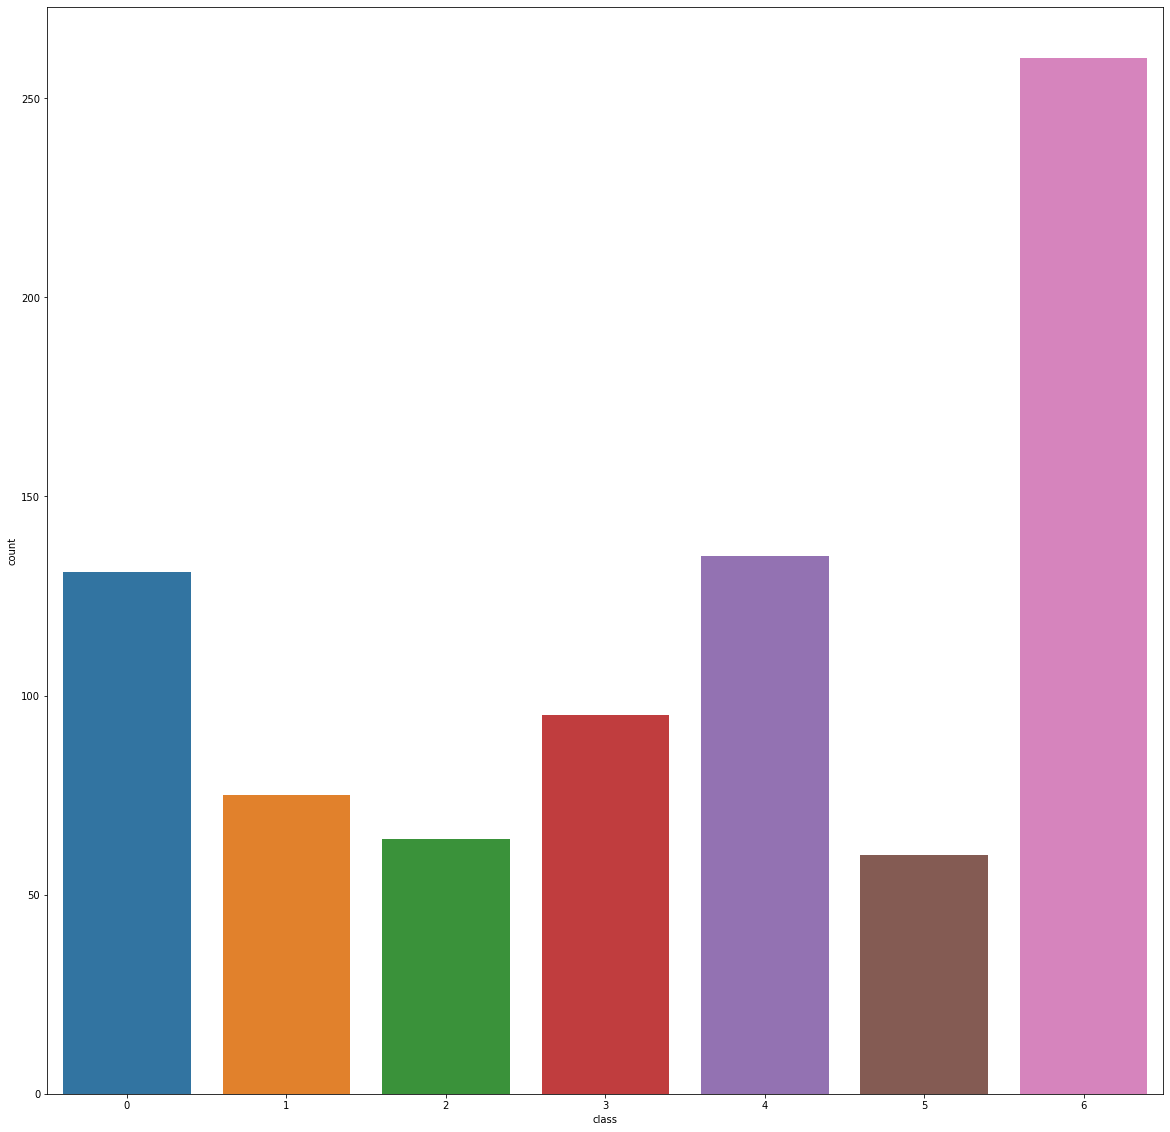

In [55]:
# Visualize target variables:

plt.figure(figsize=(20,20))
sns.countplot(dog_dt['class'])

C:\Users\a0g0btd\Anaconda3\envs\DNASequence\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

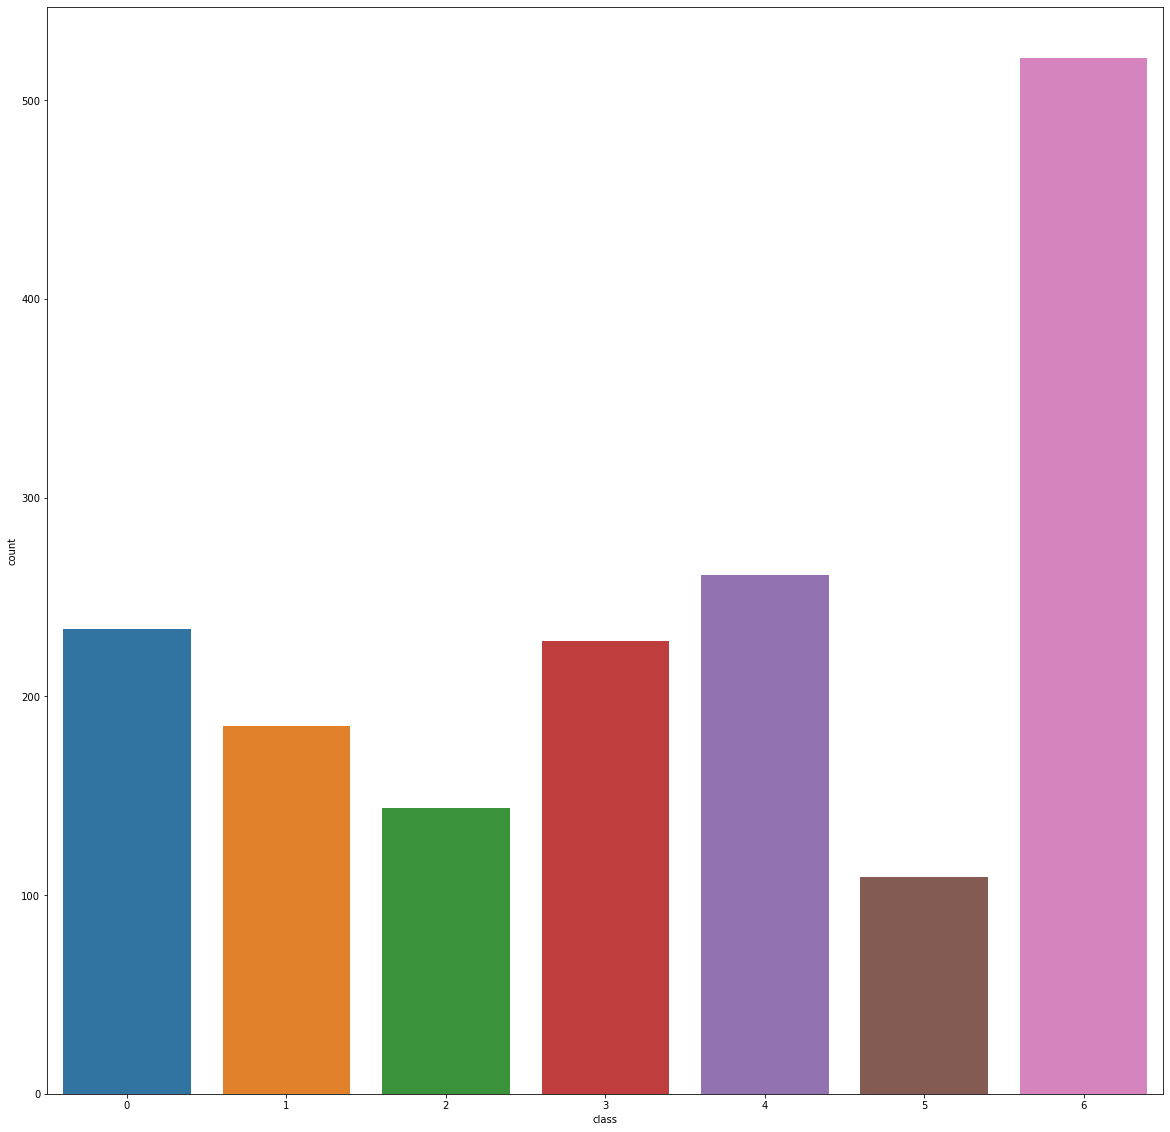

In [56]:
plt.figure(figsize=(20,20))
sns.countplot(chimp_dt['class'])

In [58]:
# Applying Multinomial NB:

dog_mnb=MultinomialNB(alpha=0.1)

dog_mnb.fit(dog_Xtrain,dog_Ytrain)

dog_pred=dog_mnb.predict(dog_Xtest)

In [59]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(dog_Ytest,dog_pred)
print(accuracy)
print("*"*80)

confusion_matrix=confusion_matrix(dog_Ytest,dog_pred)
print(confusion_matrix)
print("*"*80)

classification_report=classification_report(dog_Ytest,dog_pred)
print(classification_report)
print("*"*80)

0.7317073170731707
********************************************************************************
[[16  0  0  1  0  1  0]
 [ 1 10  0  0  0  0  4]
 [ 0  0  6  1  0  0  6]
 [ 2  0  0 12  1  0  5]
 [ 4  0  0  2 12  3  6]
 [ 2  0  0  1  0  9  1]
 [ 1  0  0  1  0  1 55]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        18
           1       1.00      0.67      0.80        15
           2       1.00      0.46      0.63        13
           3       0.67      0.60      0.63        20
           4       0.92      0.44      0.60        27
           5       0.64      0.69      0.67        13
           6       0.71      0.95      0.81        58

    accuracy                           0.73       164
   macro avg       0.79      0.67      0.70       164
weighted avg       0.78      0.73      0.72       164

*****************************************************

In [60]:
chimp_mnb=MultinomialNB(alpha=0.1)

chimp_mnb.fit(chimp_Xtrain,chimp_Ytrain)

chimp_pred=chimp_mnb.predict(chimp_Xtest)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

accuracy=accuracy_score(chimp_Ytest,chimp_pred)
print(accuracy)
print("*"*80)

confusion_matrix=confusion_matrix(chimp_Ytest,chimp_pred)
print(confusion_matrix)
print("*"*80)

classification_report=classification_report(chimp_Ytest,chimp_pred)
print(classification_report)
print("*"*80)

0.9080118694362018
********************************************************************************
[[ 40   0   0   0   1   0   7]
 [  0  36   0   0   0   0   1]
 [  0   0  24   0   0   0   0]
 [  0   0   0  49   1   0   5]
 [  1   0   0   0  40   0   9]
 [  4   0   0   0   0  15   2]
 [  0   0   0   0   0   0 102]]
********************************************************************************
              precision    recall  f1-score   support

           0       0.89      0.83      0.86        48
           1       1.00      0.97      0.99        37
           2       1.00      1.00      1.00        24
           3       1.00      0.89      0.94        55
           4       0.95      0.80      0.87        50
           5       1.00      0.71      0.83        21
           6       0.81      1.00      0.89       102

    accuracy                           0.91       337
   macro avg       0.95      0.89      0.91       337
weighted avg       0.92      0.91      0.91       337

****